# Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# ETL Process

In [ ]:
# @title Read Customer Data
customers_df = pd.read_csv('/content/drive/MyDrive/Test Interview/Soal Data Scientist/customers.csv')
print(customers_df.shape)
customers_df.head()

(100, 3)


customer_id   join_date customer_location
0     CUST001  2023-01-15           Jakarta
1     CUST002  2023-01-20          Surabaya
2     CUST003  2023-02-05           Bandung
3     CUST004  2023-02-10             Medan
4     CUST005  2023-03-01           Jakarta

In [ ]:
# @title Read Product Data
product_df = pd.read_csv('/content/drive/MyDrive/Test Interview/Soal Data Scientist/products.csv')
print(product_df.shape)
product_df.head()

(50, 4)


product_id         product_name product_category     price
0    PROD001        Laptop Pro 15       Elektronik  15000000
1    PROD002         Smartphone X       Elektronik   8500000
2    PROD003       Wireless Mouse       Elektronik    250000
3    PROD004  Mechanical Keyboard       Elektronik    800000
4    PROD005        T-Shirt Katun          Pakaian    150000

In [ ]:
# @title Read Transaction Data
transaction_df = pd.read_csv('/content/drive/MyDrive/Test Interview/Soal Data Scientist/transactions.csv')
print(transaction_df.shape)
transaction_df.head()

(498, 5)


transaction_id customer_id product_id        timestamp  quantity
0        TRX0001     CUST001    PROD005  1/20/2023 10:05       2.0
1        TRX0002     CUST002    PROD002  1/22/2023 14:30       1.0
2        TRX0003     CUST001    PROD003    2/1/2023 9:15       1.0
3        TRX0004     CUST003    PROD011   2/8/2023 18:45       1.0
4        TRX0005     CUST005    PROD001   3/5/2023 11:20       1.0

# Cleaning Data

In [ ]:
# Convert the 'timestamp' column to datetime objects and then format it
transaction_df['timestamp'] = pd.to_datetime(transaction_df['timestamp']).dt.strftime('%Y-%m-%d %H:%M:%S')
print(transaction_df.head())

  transaction_id customer_id product_id            timestamp  quantity
0        TRX0001     CUST001    PROD005  2023-01-20 10:05:00       2.0
1        TRX0002     CUST002    PROD002  2023-01-22 14:30:00       1.0
2        TRX0003     CUST001    PROD003  2023-02-01 09:15:00       1.0
3        TRX0004     CUST003    PROD011  2023-02-08 18:45:00       1.0
4        TRX0005     CUST005    PROD001  2023-03-05 11:20:00       1.0


In [ ]:
print(customers_df.isnull().sum())
print(product_df.isnull().sum())
print(transaction_df.isnull().sum())

In [ ]:
print(customers_df.duplicated().sum())
print(product_df.duplicated().sum())
print(transaction_df.duplicated().sum())

0
0
0


In [ ]:
customers_df[customers_df.isnull().any(axis=1)]

customer_id   join_date customer_location
7      CUST008  2023-02-19               NaN
23     CUST024  2023-10-20               NaN
42     CUST043  2024-08-07               NaN
57     CUST058  2023-08-29               NaN
68     CUST069  2024-07-31               NaN

In [ ]:
display(transaction_df[transaction_df['customer_id'] == 'CUST069'])

transaction_id customer_id product_id            timestamp  quantity
88         TRX0089     CUST069    PROD049  2024-08-05 18:20:00       1.0
388        TRX0389     CUST069    PROD049  2024-08-05 18:20:00       1.0

In [ ]:
transaction_df[transaction_df.isnull().any(axis=1)]

transaction_id customer_id product_id            timestamp  quantity
201        TRX0202     CUST002    PROD005  2023-01-28 15:40:00       NaN
226        TRX0227     CUST027    PROD005  2023-11-05 12:00:00       NaN

In [ ]:
# @title Handling Data
# Menghapus baris yang kolom 'quantity' transaction_df bernilai null
transaction_df.dropna(subset=['quantity'], inplace=True)
# Replace nilai null pada customers_df['customer_location'] dengan 'Unknown Location'
customers_df['customer_location'] = customers_df['customer_location'].fillna('Unknown Location')

# Merge Data

In [ ]:
merged_transaction_product_df = pd.merge(transaction_df, product_df, on='product_id', how='inner')
merged_df = pd.merge(merged_transaction_product_df, customers_df, on='customer_id', how='inner')
print(merged_df.shape)
merged_df.head()

(496, 10)


transaction_id customer_id product_id            timestamp  quantity  \
0        TRX0001     CUST001    PROD005  2023-01-20 10:05:00       2.0   
1        TRX0002     CUST002    PROD002  2023-01-22 14:30:00       1.0   
2        TRX0003     CUST001    PROD003  2023-02-01 09:15:00       1.0   
3        TRX0004     CUST003    PROD011  2023-02-08 18:45:00       1.0   
4        TRX0005     CUST005    PROD001  2023-03-05 11:20:00       1.0   

          product_name product_category     price   join_date  \
0        T-Shirt Katun          Pakaian    150000  2023-01-15   
1         Smartphone X       Elektronik   8500000  2023-01-20   
2       Wireless Mouse       Elektronik    250000  2023-01-15   
3  Novel Fiksi "Senja"             Buku     95000  2023-02-05   
4        Laptop Pro 15       Elektronik  15000000  2023-03-01   

  customer_location  
0           Jakarta  
1          Surabaya  
2           Jakarta  
3           Bandung  
4           Jakarta

# Adding the "total_price" feature

In [ ]:
merged_df['total_price'] = merged_df['quantity'] * merged_df['price']
merged_df.head()

transaction_id customer_id product_id            timestamp  quantity  \
0        TRX0001     CUST001    PROD005  2023-01-20 10:05:00       2.0   
1        TRX0002     CUST002    PROD002  2023-01-22 14:30:00       1.0   
2        TRX0003     CUST001    PROD003  2023-02-01 09:15:00       1.0   
3        TRX0004     CUST003    PROD011  2023-02-08 18:45:00       1.0   
4        TRX0005     CUST005    PROD001  2023-03-05 11:20:00       1.0   

          product_name product_category     price   join_date  \
0        T-Shirt Katun          Pakaian    150000  2023-01-15   
1         Smartphone X       Elektronik   8500000  2023-01-20   
2       Wireless Mouse       Elektronik    250000  2023-01-15   
3  Novel Fiksi "Senja"             Buku     95000  2023-02-05   
4        Laptop Pro 15       Elektronik  15000000  2023-03-01   

  customer_location  total_price  
0           Jakarta     300000.0  
1          Surabaya    8500000.0  
2           Jakarta     250000.0  
3           Bandung      95000.0  
4           Jakarta   15000000.0

# Load into database

In [ ]:
cursor.execute("DROP TABLE IF EXISTS transactions")
conn.commit()
print("Table 'transactions' dropped successfully.")

In [ ]:
import sqlite3

# connect database
conn = sqlite3.connect("mydb.db")
cursor = conn.cursor()

# create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS transactions (
    transaction_id TEXT PRIMARY KEY,
    customer_id TEXT,
    product_id TEXT,
    time TIMESTAMP,
    quantity INTEGER,
    product_name TEXT,
    product_category TEXT,
    price INTEGER,
    join_date DATE,
    customer_location TEXT,
    total_price INTEGER
)
""")

In [ ]:
# get table info for 'transactions'
cursor.execute("PRAGMA table_info(transactions)")
table_info = cursor.fetchall()

# display the table info
for column in table_info:
    print(column)

(0, 'transaction_id', 'TEXT', 0, None, 1)
(1, 'customer_id', 'TEXT', 0, None, 0)
(2, 'product_id', 'TEXT', 0, None, 0)
(3, 'time', 'TIMESTAMP', 0, None, 0)
(4, 'quantity', 'INTEGER', 0, None, 0)
(5, 'product_name', 'TEXT', 0, None, 0)
(6, 'product_category', 'TEXT', 0, None, 0)
(7, 'price', 'INTEGER', 0, None, 0)
(8, 'join_date', 'DATE', 0, None, 0)
(9, 'customer_location', 'TEXT', 0, None, 0)
(10, 'total_price', 'INTEGER', 0, None, 0)


In [ ]:
# Query insert
for index, row in merged_df.iterrows():
    cursor.execute("""
    INSERT INTO transactions (transaction_id, customer_id, product_id, time, quantity, product_name, product_category, price, join_date, customer_location, total_price)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, (row['transaction_id'], row['customer_id'], row['product_id'], row['timestamp'], row['quantity'], row['product_name'], row['product_category'], row['price'], row['join_date'], row['customer_location'], row['total_price']))

# Commit
conn.commit()

In [ ]:
cursor.execute("SELECT * FROM transactions")
rows = cursor.fetchall()

# get column names from cursor description
column_names = [description[0] for description in cursor.description]

# create a pandas DataFrame
sql_df = pd.DataFrame(rows, columns=column_names)

# display the DataFrame
display(sql_df)

transaction_id customer_id product_id                 time  quantity  \
0          TRX0001     CUST001    PROD005  2023-01-20 10:05:00         2   
1          TRX0002     CUST002    PROD002  2023-01-22 14:30:00         1   
2          TRX0003     CUST001    PROD003  2023-02-01 09:15:00         1   
3          TRX0004     CUST003    PROD011  2023-02-08 18:45:00         1   
4          TRX0005     CUST005    PROD001  2023-03-05 11:20:00         1   
..             ...         ...        ...                  ...       ...   
491        TRX0494     CUST044    PROD017  2024-11-01 17:00:00         1   
492        TRX0495     CUST045    PROD009  2024-12-01 19:00:00         1   
493        TRX0496     CUST046    PROD023  2025-01-01 08:00:00         1   
494        TRX0497     CUST047    PROD004  2025-02-01 10:00:00         1   
495        TRX0498     CUST048    PROD008  2025-03-01 12:00:00         1   

            product_name product_category     price   join_date  \
0          T-Shirt Katun          Pakaian    150000  2023-01-15   
1           Smartphone X       Elektronik   8500000  2023-01-20   
2         Wireless Mouse       Elektronik    250000  2023-01-15   
3    Novel Fiksi "Senja"             Buku     95000  2023-02-05   
4          Laptop Pro 15       Elektronik  15000000  2023-03-01   
..                   ...              ...       ...         ...   
491  Headphone Bluetooth       Elektronik    600000  2024-08-22   
492          Matras Yoga         Olahraga    300000  2024-09-05   
493        Sandal Gunung          Pakaian    280000  2024-09-19   
494  Mechanical Keyboard       Elektronik    800000  2024-10-03   
495          Sepatu Lari         Olahraga    750000  2024-10-15   

    customer_location  total_price  
0             Jakarta       300000  
1            Surabaya      8500000  
2             Jakarta       250000  
3             Bandung        95000  
4             Jakarta     15000000  
..                ...          ...  
491           Jakarta       600000  
492          Makassar       300000  
493             Medan       280000  
494           Jakarta       800000  
495          Surabaya       750000  

[496 rows x 11 columns]

In [ ]:
# @title Produk Terlaris
query = """
SELECT
    product_id,
    product_name,
    SUM(total_price) AS total_revenue
FROM
    transactions
GROUP BY
    product_id, product_name
ORDER BY
    total_revenue DESC
LIMIT 5;
"""

cursor.execute(query)
rows = cursor.fetchall()

# get column names from cursor description
column_names = [description[0] for description in cursor.description]

# create a pandas DataFrame
sql_df = pd.DataFrame(rows, columns=column_names)

# display the DataFrame
display(sql_df)

product_id         product_name  total_revenue
0    PROD001        Laptop Pro 15      390000000
1    PROD002         Smartphone X      238000000
2    PROD008          Sepatu Lari       18750000
3    PROD004  Mechanical Keyboard       14400000
4    PROD041       Tablet 10 inch       13500000

In [ ]:
# @title Pelanggan Paling Berharga
query = """
SELECT
    customer_id,
    SUM(total_price) AS total_spent
FROM
    transactions
GROUP BY
    customer_id
ORDER BY
    total_spent DESC
LIMIT 10;
"""

cursor.execute(query)
rows = cursor.fetchall()

# get column names from cursor description
column_names = [description[0] for description in cursor.description]

# create a pandas DataFrame
sql_df = pd.DataFrame(rows, columns=column_names)

# display the DataFrame
display(sql_df)

customer_id  total_spent
0     CUST005    111600000
1     CUST033     90600000
2     CUST021     62500000
3     CUST001     56590000
4     CUST029     52200000
5     CUST041     51800000
6     CUST018     50200000
7     CUST037     31500000
8     CUST025     31300000
9     CUST071     30000000

In [ ]:
# @title Tren Penjualan Bulanan
query = """
SELECT
    strftime('%Y-%m', time) AS sale_month,
    SUM(total_price) AS monthly_revenue
FROM
    transactions
GROUP BY
    sale_month
ORDER BY
    sale_month;
"""

cursor.execute(query)
rows = cursor.fetchall()

# get column names from cursor description
column_names = [description[0] for description in cursor.description]

# create a pandas DataFrame
sql_df = pd.DataFrame(rows, columns=column_names)

display(sql_df)

sale_month  monthly_revenue
0     2023-01         24500000
1     2023-02         33380000
2     2023-03         53080000
3     2023-04          4930000
4     2023-05          7630000
5     2023-06         10620000
6     2023-07         14760000
7     2023-08         39200000
8     2023-09         19660000
9     2023-10         22470000
10    2023-11         43040000
11    2023-12         79920000
12    2024-01         48950000
13    2024-02          5180000
14    2024-03          5680000
15    2024-04         35600000
16    2024-05          6160000
17    2024-06         52390000
18    2024-07         58045000
19    2024-08         56830000
20    2024-09         35125000
21    2024-10         57010000
22    2024-11         16990000
23    2024-12         23750000
24    2025-01         47610000
25    2025-02          6660000
26    2025-03          2770000
27    2025-04           400000
28    2025-05           120000

In [ ]:
# Extract year from 'sale_month'
sql_df['sale_year'] = pd.to_datetime(sql_df['sale_month']).dt.year

# Calculate the average monthly revenue per year
average_monthly_revenue_per_year = sql_df.groupby('sale_year')['monthly_revenue'].mean().reset_index()

# Format the average monthly revenue for better readability (e.g., in millions)
average_monthly_revenue_per_year['average_monthly_revenue'] = (average_monthly_revenue_per_year['monthly_revenue'] / 1_000_000).round(2).astype(str) + ' Juta'

print("Rata-rata Pendapatan Bulanan per Tahun:")
display(average_monthly_revenue_per_year[['sale_year', 'average_monthly_revenue']])

Rata-rata Pendapatan Bulanan per Tahun:


sale_year average_monthly_revenue
0       2023              29.43 Juta
1       2024              33.48 Juta
2       2025              11.51 Juta

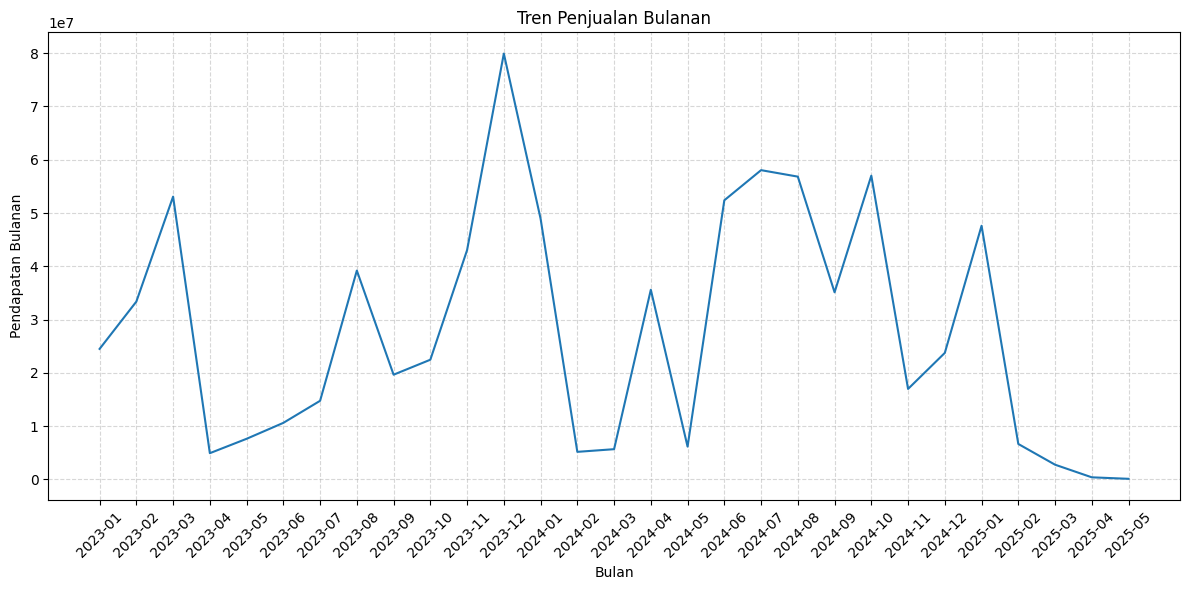

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sql_df['sale_month'], sql_df['monthly_revenue'])
plt.xlabel('Bulan')
plt.ylabel('Pendapatan Bulanan')
plt.title('Tren Penjualan Bulanan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

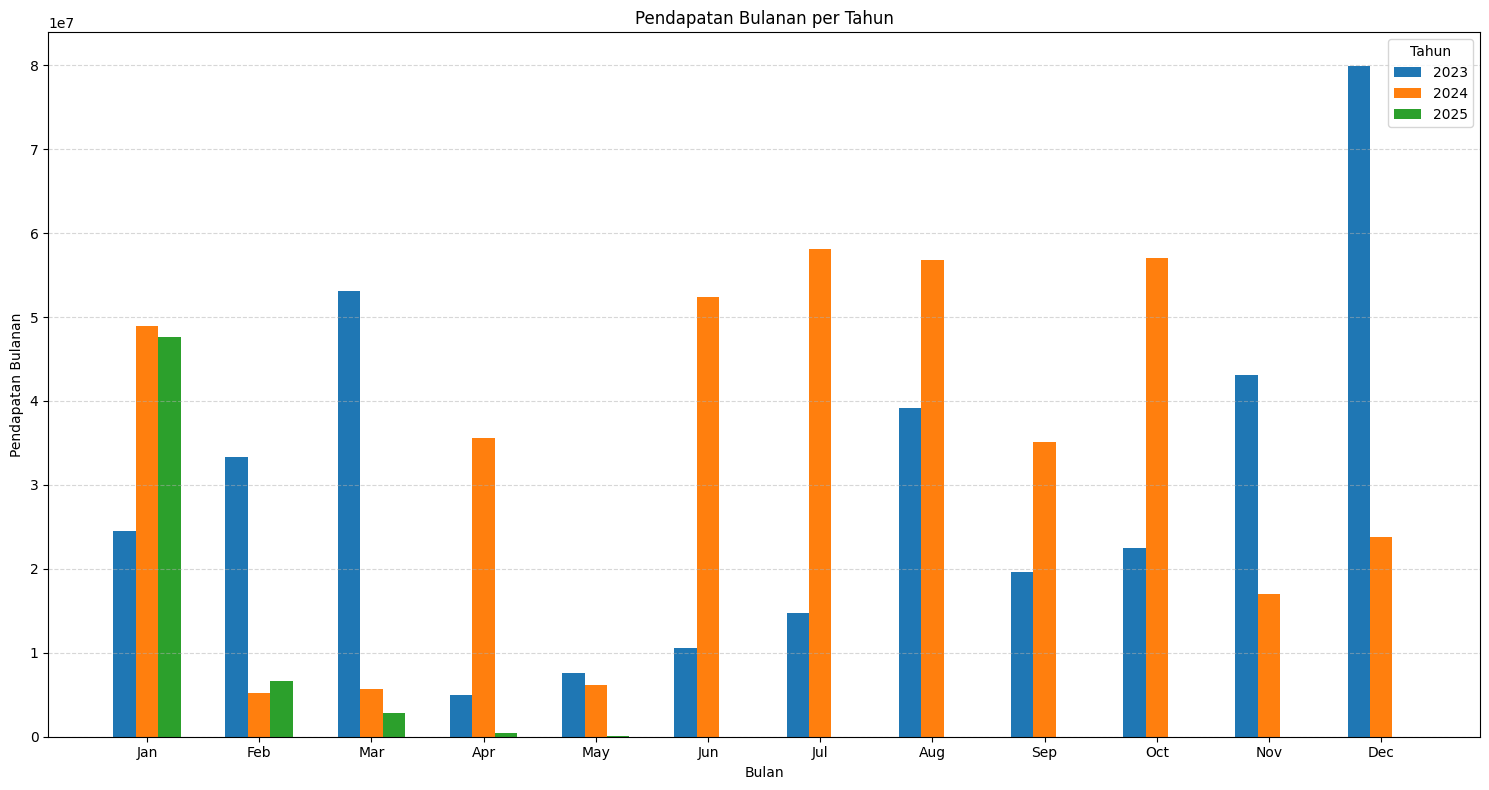

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 8))

# Extract month and year from 'sale_month'
sql_df['month'] = pd.to_datetime(sql_df['sale_month']).dt.strftime('%b')
sql_df['year'] = pd.to_datetime(sql_df['sale_month']).dt.year

# Get unique months and years
months = sql_df['month'].unique()
years = sql_df['year'].unique()

# Sort months in chronological order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months = [m for m in month_order if m in months]

bar_width = 0.2
x = np.arange(len(months))

for i, year in enumerate(years):
    yearly_data = sql_df[sql_df['year'] == year]
    monthly_revenue = yearly_data.set_index('month').reindex(months)['monthly_revenue'].fillna(0)
    plt.bar(x + i * bar_width, monthly_revenue, bar_width, label=str(year))

plt.xlabel('Bulan')
plt.ylabel('Pendapatan Bulanan')
plt.title('Pendapatan Bulanan per Tahun')
plt.xticks(x + bar_width * (len(years) - 1) / 2, months)
plt.legend(title='Tahun')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Prediksi Churn Customer

In [ ]:
cursor.execute("SELECT * FROM transactions")
rows = cursor.fetchall()

column_names = [description[0] for description in cursor.description]

data = pd.DataFrame(rows, columns=column_names)
display(data)

transaction_id customer_id product_id                 time  quantity  \
0          TRX0001     CUST001    PROD005  2023-01-20 10:05:00         2   
1          TRX0002     CUST002    PROD002  2023-01-22 14:30:00         1   
2          TRX0003     CUST001    PROD003  2023-02-01 09:15:00         1   
3          TRX0004     CUST003    PROD011  2023-02-08 18:45:00         1   
4          TRX0005     CUST005    PROD001  2023-03-05 11:20:00         1   
..             ...         ...        ...                  ...       ...   
491        TRX0494     CUST044    PROD017  2024-11-01 17:00:00         1   
492        TRX0495     CUST045    PROD009  2024-12-01 19:00:00         1   
493        TRX0496     CUST046    PROD023  2025-01-01 08:00:00         1   
494        TRX0497     CUST047    PROD004  2025-02-01 10:00:00         1   
495        TRX0498     CUST048    PROD008  2025-03-01 12:00:00         1   

            product_name product_category     price   join_date  \
0          T-Shirt Katun          Pakaian    150000  2023-01-15   
1           Smartphone X       Elektronik   8500000  2023-01-20   
2         Wireless Mouse       Elektronik    250000  2023-01-15   
3    Novel Fiksi "Senja"             Buku     95000  2023-02-05   
4          Laptop Pro 15       Elektronik  15000000  2023-03-01   
..                   ...              ...       ...         ...   
491  Headphone Bluetooth       Elektronik    600000  2024-08-22   
492          Matras Yoga         Olahraga    300000  2024-09-05   
493        Sandal Gunung          Pakaian    280000  2024-09-19   
494  Mechanical Keyboard       Elektronik    800000  2024-10-03   
495          Sepatu Lari         Olahraga    750000  2024-10-15   

    customer_location  total_price  
0             Jakarta       300000  
1            Surabaya      8500000  
2             Jakarta       250000  
3             Bandung        95000  
4             Jakarta     15000000  
..                ...          ...  
491           Jakarta       600000  
492          Makassar       300000  
493             Medan       280000  
494           Jakarta       800000  
495          Surabaya       750000  

[496 rows x 11 columns]

In [ ]:
from datetime import datetime

# Convert 'time' and 'join_date' to datetime objects
data['time'] = pd.to_datetime(data['time'])
data['join_date'] = pd.to_datetime(data['join_date'])

# Calculate recency (days since last transaction)
latest_date = data['time'].max()
recency = data.groupby('customer_id')['time'].max().reset_index()
recency['recency_days'] = (latest_date - recency['time']).dt.days
recency = recency[['customer_id', 'recency_days']]

# Calculate frequency (number of transactions)
transaction_count = data.groupby('customer_id').size().reset_index(name='transaction_count')

# Calculate monetary value (total spending)
total_revenue = data.groupby('customer_id')['total_price'].sum().reset_index(name='total_revenue')

# Calculate average time between transactions
data_sorted = data.sort_values(by=['customer_id', 'time'])
data_sorted['time_diff'] = data_sorted.groupby('customer_id')['time'].diff()
average_time_between_transactions = data_sorted.groupby('customer_id')['time_diff'].mean().dt.days.reset_index(name='avg_time_between_transactions_days')

# Calculate number of unique products purchased
unique_products_count = data.groupby('customer_id')['product_id'].nunique().reset_index(name='unique_products_count')

# Calculate total quantity purchased
total_quantity = data.groupby('customer_id')['quantity'].sum().reset_index(name='total_quantity')

# Get most frequent product category
most_frequent_category = data.groupby('customer_id')['product_category'].agg(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index(name='most_frequent_category')

# Get join date and customer location
customer_info = data[['customer_id', 'join_date', 'customer_location']].drop_duplicates()

# Calculate duration since joining
customer_info['duration_since_joining_days'] = (latest_date - customer_info['join_date']).dt.days

# Merge all features
customer_features = recency.merge(transaction_count, on='customer_id', how='left')
customer_features = customer_features.merge(total_revenue, on='customer_id', how='left')
customer_features = customer_features.merge(average_time_between_transactions, on='customer_id', how='left')
customer_features = customer_features.merge(unique_products_count, on='customer_id', how='left')
customer_features = customer_features.merge(total_quantity, on='customer_id', how='left')
customer_features = customer_features.merge(most_frequent_category, on='customer_id', how='left')
customer_features = customer_features.merge(customer_info, on='customer_id', how='left')

# Fill NaN values in avg_time_between_transactions_days for customers with only one transaction
customer_features['avg_time_between_transactions_days'] = customer_features['avg_time_between_transactions_days'].fillna(0)

# Define churn based on recency (e.g., no transaction in the last 90 days)
churn_threshold_days = 90
customer_features['churn'] = (customer_features['recency_days'] > churn_threshold_days).astype(int)

# Display the engineered features
display(customer_features.head())

customer_id  recency_days  transaction_count  total_revenue  \
0     CUST001           100                 22       56590000   
1     CUST002           116                 17       29390000   
2     CUST003           290                 10        1175000   
3     CUST004           285                  8        4330000   
4     CUST005            96                 18      111600000   

   avg_time_between_transactions_days  unique_products_count  total_quantity  \
0                                  34                      9              25   
1                                  44                      6              23   
2                                  58                      4              14   
3                                  74                      4               8   
4                                  40                      5              26   

  most_frequent_category  join_date customer_location  \
0             Elektronik 2023-01-15           Jakarta   
1                Pakaian 2023-01-20          Surabaya   
2                   Buku 2023-02-05           Bandung   
3                Pakaian 2023-02-10             Medan   
4             Elektronik 2023-03-01           Jakarta   

   duration_since_joining_days  churn  
0                          837      1  
1                          832      1  
2                          816      1  
3                          811      1  
4                          792      1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Handle missing values in 'customer_location' (e.g., fill with a placeholder or the mode)
customer_features['customer_location'] = customer_features['customer_location'].fillna('Unknown')

# Identify categorical and numerical features
categorical_features = ['most_frequent_category', 'customer_location']
numerical_features = ['recency_days', 'transaction_count', 'total_revenue', 'avg_time_between_transactions_days', 'unique_products_count', 'total_quantity', 'duration_since_joining_days']

# Create a column transformer for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Define features (X) and target (y)
X = customer_features.drop(['customer_id', 'join_date', 'churn'], axis=1)
y = customer_features['churn']

# Apply preprocessing to X
X = preprocessor.fit_transform(X)

# Convert the processed data back to a DataFrame (optional, but helpful for inspection)
# Get feature names after one-hot encoding
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
X = pd.DataFrame(X, columns=feature_names)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

display(X_train.head())

X_train shape: (64, 24)
X_test shape: (16, 24)
y_train shape: (64,)
y_test shape: (16,)


recency_days  transaction_count  total_revenue  \
78         716.0                2.0       600000.0   
29         150.0                8.0      2240000.0   
49           0.0                7.0       840000.0   
76         781.0                2.0       900000.0   
73         137.0                2.0      1600000.0   

    avg_time_between_transactions_days  unique_products_count  total_quantity  \
78                                 0.0                    1.0             2.0   
29                                65.0                    1.0             8.0   
49                                51.0                    1.0             7.0   
76                                 0.0                    1.0             2.0   
73                                 0.0                    1.0             2.0   

    duration_since_joining_days  most_frequent_category_Buku  \
78                        726.0                          0.0   
29                        462.0                          0.0   
49                        172.0                          1.0   
76                        790.0                          0.0   
73                        141.0                          0.0   

    most_frequent_category_Elektronik  most_frequent_category_Olahraga  ...  \
78                                0.0                              1.0  ...   
29                                0.0                              0.0  ...   
49                                0.0                              0.0  ...   
76                                0.0                              0.0  ...   
73                                1.0                              0.0  ...   

    customer_location_Denpasar  customer_location_Jakarta  \
78                         0.0                        0.0   
29                         0.0                        0.0   
49                         0.0                        0.0   
76                         0.0                        0.0   
73                         0.0                        0.0   

    customer_location_Makassar  customer_location_Manado  \
78                         0.0                       0.0   
29                         0.0                       0.0   
49                         0.0                       0.0   
76                         0.0                       0.0   
73                         0.0                       0.0   

    customer_location_Medan  customer_location_Palembang  \
78                      0.0                          0.0   
29                      1.0                          0.0   
49                      0.0                          0.0   
76                      0.0                          0.0   
73                      0.0                          1.0   

    customer_location_Semarang  customer_location_Surabaya  \
78                         0.0                         0.0   
29                         0.0                         0.0   
49                         0.0                         0.0   
76                         0.0                         0.0   
73                         0.0                         0.0   

    customer_location_Unknown Location  customer_location_Yogyakarta  
78                                 0.0                           0.0  
29                                 0.0                           0.0  
49                                 0.0                           1.0  
76                                 0.0                           0.0  
73                                 0.0                           0.0  

[5 rows x 24 columns]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


In [ ]:
import pandas as pd

# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Get feature names from the preprocessed data
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display the feature importances
display(feature_importance_df)

feature  importance
0                          recency_days    0.433424
6           duration_since_joining_days    0.142107
3    avg_time_between_transactions_days    0.108848
5                        total_quantity    0.064157
2                         total_revenue    0.044010
4                 unique_products_count    0.040167
1                     transaction_count    0.036656
13            customer_location_Bandung    0.020061
22   customer_location_Unknown Location    0.017425
9       most_frequent_category_Olahraga    0.016719
15            customer_location_Jakarta    0.014945
10       most_frequent_category_Pakaian    0.014478
7           most_frequent_category_Buku    0.011118
23         customer_location_Yogyakarta    0.010922
16           customer_location_Makassar    0.005826
14           customer_location_Denpasar    0.003837
19          customer_location_Palembang    0.003642
18              customer_location_Medan    0.003519
20           customer_location_Semarang    0.002685
21           customer_location_Surabaya    0.002472
8     most_frequent_category_Elektronik    0.002110
11  most_frequent_category_Rumah Tangga    0.000871
12         customer_location_Balikpapan    0.000000
17             customer_location_Manado    0.000000

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict on the test set
y_pred = random_forest_model.predict(X_test)
y_prob = random_forest_model.predict_proba(X_test)[:, 1] # Probability of churn

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
ROC AUC Score: 1.0000


In [ ]:
# Predict churn probability for all customers in the original customer_features DataFrame
# We need to preprocess the entire customer_features DataFrame first
X_all = customer_features.drop(['customer_id', 'join_date', 'churn'], axis=1)
X_all_processed = preprocessor.transform(X_all) # Use the same preprocessor fitted on training data

# Get churn probabilities
churn_probabilities = random_forest_model.predict_proba(X_all_processed)[:, 1]

# Add churn probabilities to the customer_features DataFrame
customer_features['churn_probability'] = churn_probabilities

# Define a threshold for high risk of churn (e.g., probability > 0.5)
churn_risk_threshold = 0.5

# Identify customers at high risk of churn
high_risk_customers = customer_features[customer_features['churn_probability'] > churn_risk_threshold]

# Sort high-risk customers by churn probability in descending order
high_risk_customers = high_risk_customers.sort_values(by='churn_probability', ascending=False)

# Display the list of high-risk customers
print(f"Customers at high risk of churn (probability > {churn_risk_threshold}):")
display(high_risk_customers[['customer_id', 'churn_probability', 'recency_days', 'transaction_count', 'total_revenue', 'most_frequent_category', 'customer_location']])

Customers at high risk of churn (probability > 0.5):


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


customer_id  churn_probability  recency_days  transaction_count  \
17     CUST018               1.00           211                  8   
14     CUST015               1.00           228                  8   
8      CUST009               1.00           259                  8   
6      CUST007               1.00           269                  8   
5      CUST006               1.00           272                  8   
..         ...                ...           ...                ...   
4      CUST005               0.92            96                 18   
34     CUST035               0.91           127                  8   
22     CUST023               0.91           101                  8   
1      CUST002               0.89           116                 17   
39     CUST040               0.83           101                  8   

    total_revenue most_frequent_category customer_location  
17       50200000             Elektronik           Jakarta  
14       26750000             Elektronik          Surabaya  
8         3320000           Rumah Tangga          Semarang  
6         4050000           Rumah Tangga          Surabaya  
5         1750000               Olahraga        Yogyakarta  
..            ...                    ...               ...  
4       111600000             Elektronik           Jakarta  
34        3800000                Pakaian           Bandung  
22        3000000                Pakaian           Bandung  
1        29390000                Pakaian          Surabaya  
39        2400000             Elektronik           Jakarta  

[69 rows x 7 columns]